In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ode

In [2]:
def f(Y,t,p):
  resultado = np.array([ 0.04*Y[0]**2 + 5*Y[0] + 140 - Y[1] + p[4], p[0]*(p[1]*Y[0] - Y[1])])
  return (resultado)

In [3]:
# Los diferentes modelos dinámicos

# modelo = [a, b, c, d, corriente]

# Dejamos el último espacio del array para el tipo de corriente
# Regular Spike
RS  = np.array([0.02, 0.2, -65, 8, 0 ])

# Intrinsically bursting
IB  = np.array([0.02, 0.2,- 55, 4, 0])

# Chattering
CH  = np.array([0.02, 0.2, -50, 2, 0])

# Fast Spiking
FS  = np.array([0.1, 0.2, -65,  2, 0])

# Talmo-Cortical
TC1  = np.array([0.02, 0.25, -65, 0.05, 0])

# Talmo-Cortical
TC2  = np.array([0.02, 0.25, -65, 0.05, 0])

# Resonator
RZ  = np.array([0.1, 0.26, -65, 2 , 0])

# Low-Threshold Spiking
LTS = np.array([0.02, 0.25, -65, 2, 0])

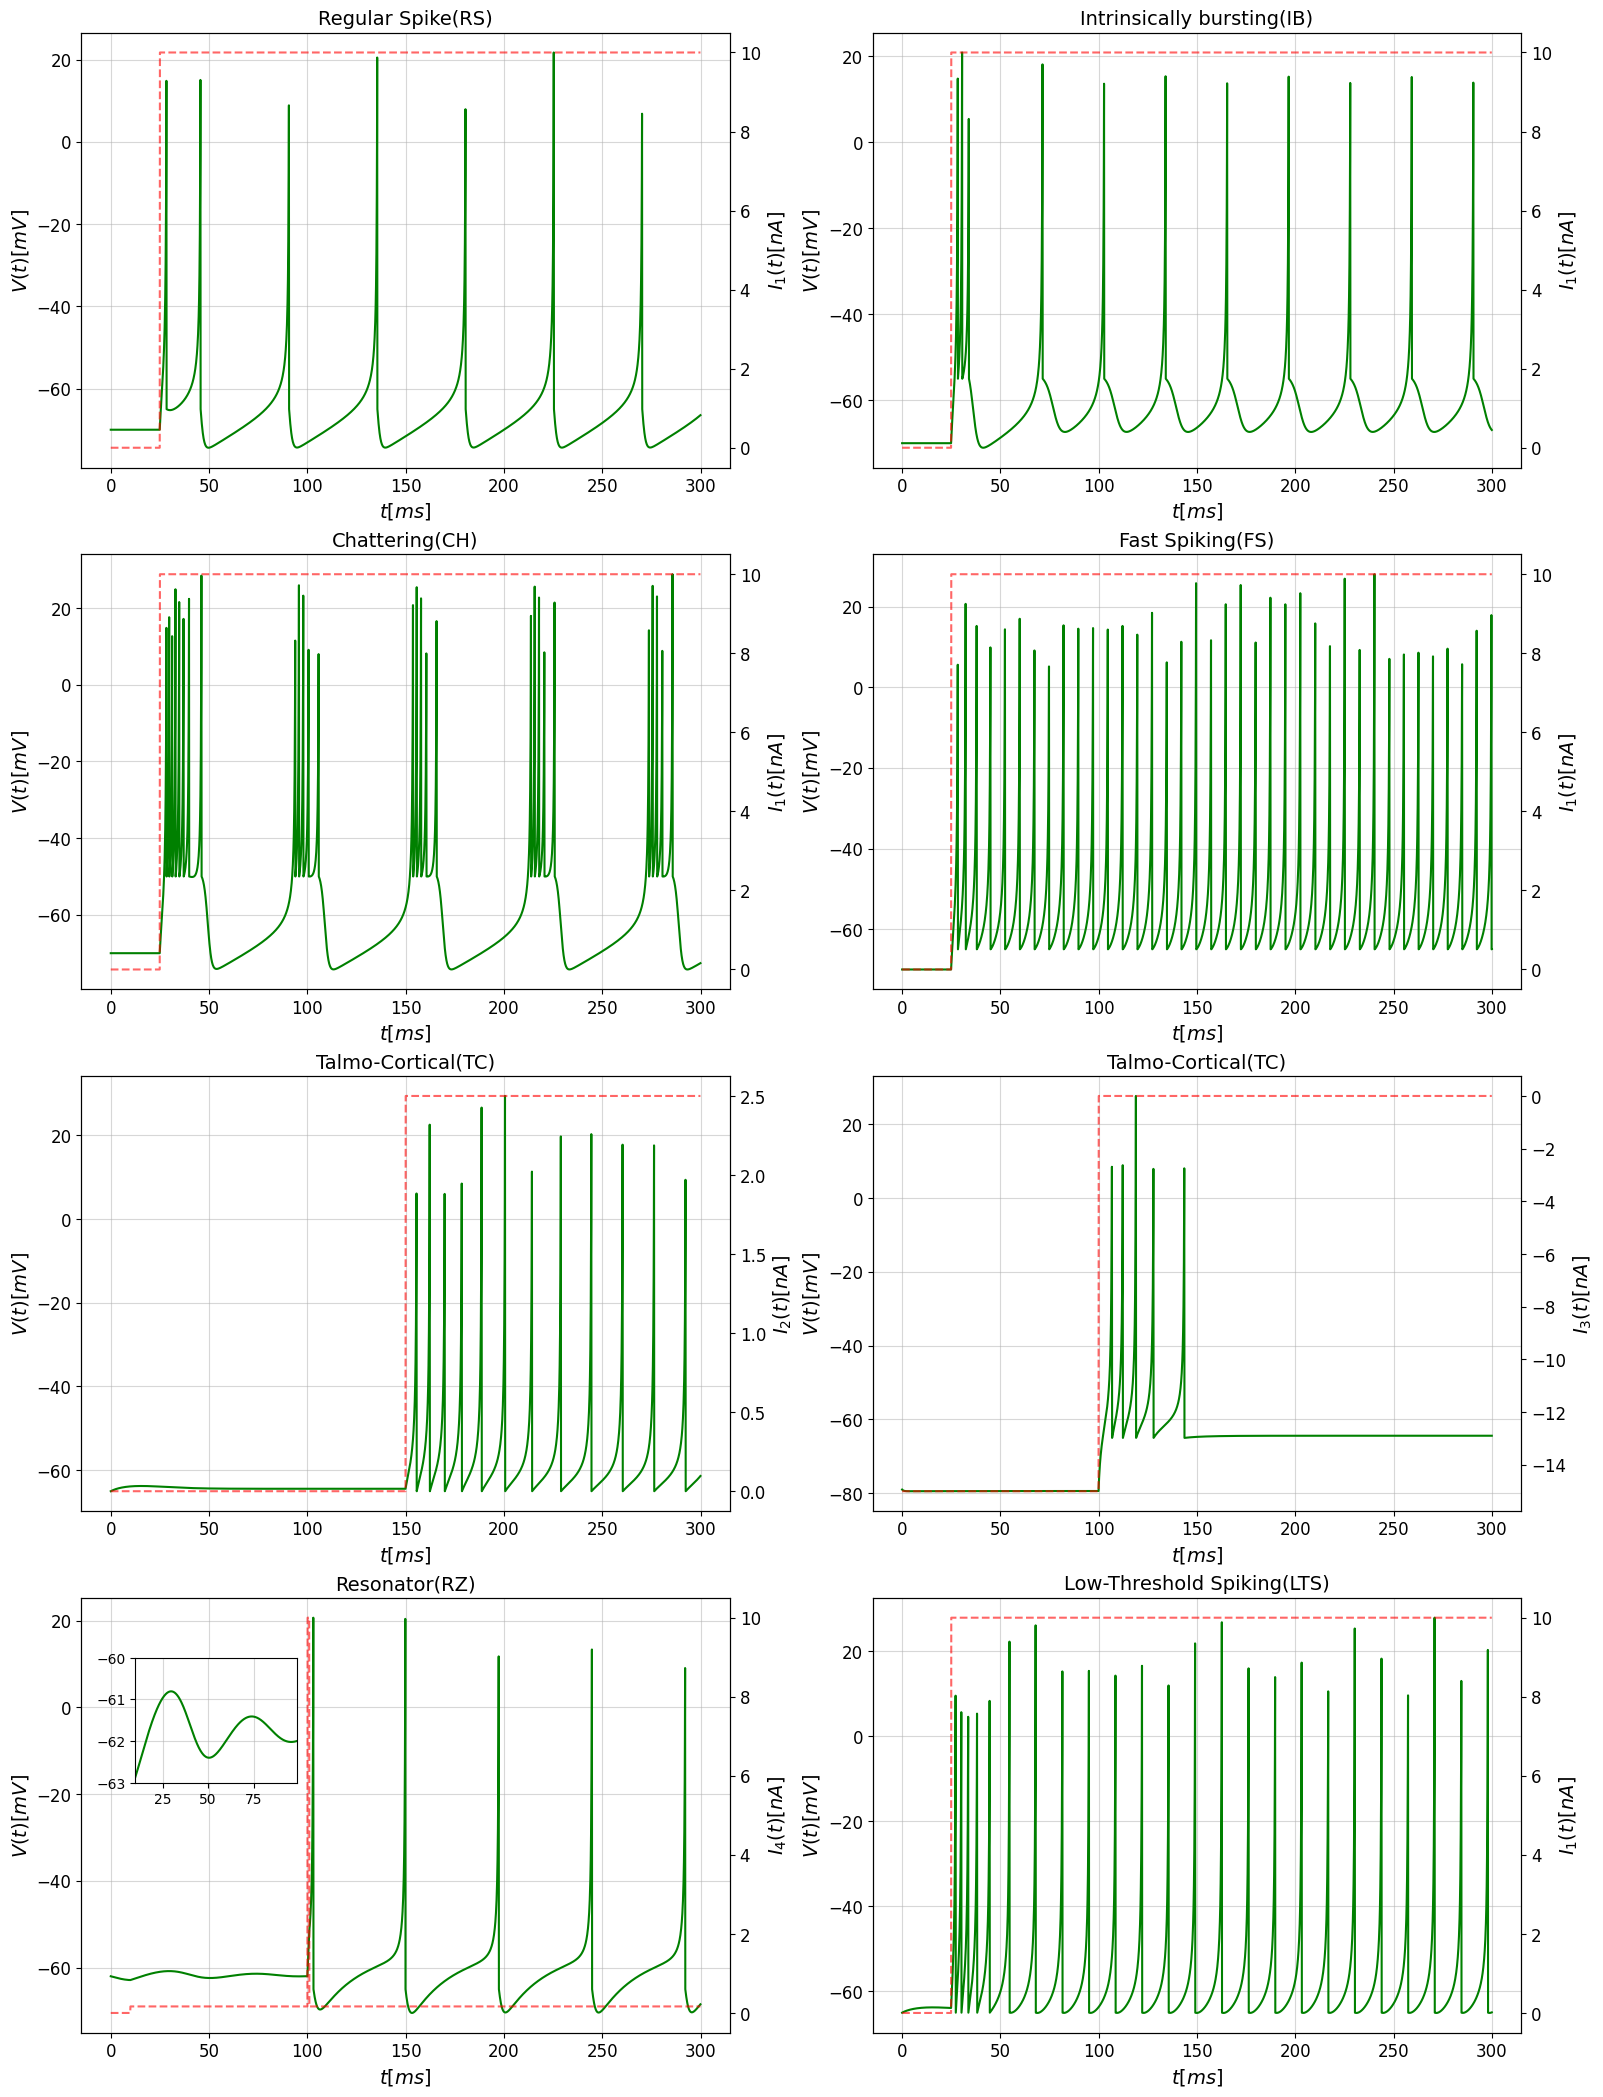

In [7]:
# Condiciones iniciales junto con valores de parámetros
X_o  = np.array([[-70, -70*RS[1]],#RS
                [-70, -70*IB[1]],#IB
                 [-70, -70*CH[1]],#CH
                  [-70, -70*FS[1]],#FC
                   [-65, -65*TC1[1]],#TC1
                    [-79, -79*TC2[1]],#TC2
                     [-62, -62*RZ[1]],#RZ 63 funciona
                      [-65, -65*LTS[1]]])#LTS

T    = np.array([0,300])

P    = [RS, IB, CH, FS, TC1, TC2, RZ, LTS]
I    = [ode.I1, ode.I1, ode.I1, ode.I1, ode.I2,  ode.I3,  ode.I4, ode.I1]

J    = [0,1,2,3,4,5,6,7]

Names     = ['Regular Spike(RS)','Intrinsically bursting(IB)','Chattering(CH)','Fast Spiking(FS)','Talmo-Cortical(TC)','Talmo-Cortical(TC)','Resonator(RZ)','Low-Threshold Spiking(LTS)']
Names_corr= [r'$I_{1}(t)[nA]$',r'$I_{1}(t)[nA]$',r'$I_{1}(t)[nA]$',r'$I_{1}(t)[nA]$',r'$I_{2}(t)[nA]$',r'$I_{3}(t)[nA]$',r'$I_{4}(t)[nA]$',r'$I_{1}(t)[nA]$']

# Armamos la figura

fig, ax = plt.subplots(4,2,figsize=(18,25))#30,25
ax  = ax.flatten()

for p,j,nom,corr,names_corr,x_o in zip(P,J,Names,I,Names_corr,X_o):

   k = int((T[1]-T[0])/0.1) # Definimos la cantidad de pasos según el tamaño del paso que querramos

  #  Resolvemos es sistema
   y_fin,t_fin,I_fin = ode.integrador_ode_Izhike(f,x_o,T[0],T[1],k,p,corr)

  #Resultados para las variables
   v = y_fin[:,0]
   u = y_fin[:,1]

   ax[j].plot(t_fin,v, c='g', label='$v(t)$')
  #  ax[j].plot(t_fin,u, c='b', label='$u(t)$')
   ax[j].set_xlabel(r'$t[ms]$',fontsize=14)
   ax[j].set_ylabel(r'$V(t)[mV]$',fontsize=14)
   ax[j].set_title(nom,fontsize=14)

  # make a plot with different y-axis using second axis object
   ax2 = ax[j].twinx()

   ax2.plot(t_fin, I_fin, color='r',linestyle='dashed',alpha=0.6, label=r'$I(t)$')
   ax2.set_ylabel(names_corr,fontsize=14)
   ax2.tick_params(axis='both',labelsize  = 12)

  #  Creamos una figura del zoom para el modelo Resonator
   if j==6:

    # inset
    l, b, h, w = .13, .2, .05, .09 #x_0,y_0,alto,ancho
    inset_ax = fig.add_axes([l, b, w, h]) # X, Y, width, height

    inset_ax.plot(t_fin,v,c='g')
    inset_ax.grid(alpha=0.5)
    # inset_ax.set_title('')

    # set axis range
    inset_ax.set_xlim(10, 99)
    inset_ax.set_ylim(-63, -60)

    # set axis tick locations
    # inset_ax.set_yticks([0, 0.005, 0.01])
    # inset_ax.set_xticks([-0.1,0,.1])
   ax[j].tick_params(axis='both',labelsize  = 12)
   ax[j].grid(alpha=0.5)
  #  plt.savefig('modelos_disparo('+nom+').pdf')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.22,
                    hspace=0.2)

# plt.savefig("modelos_disparo.pdf")
plt.show()